# Python for data analysis : Data-visualization

Dataset : [Drug consumption dataset](https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29) <br/>
Link to dataset : [dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data)

## 1. Import librairies needed for the analysis

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading dataset

In [42]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data", header = None)
# dataset = pd.read_csv("/datasets/drug_consumption_dataset/drug_consumption.data", header = None)

### Adding columns' names

In [43]:
columns = ['ID', 'AGE', 'GENDER', 'EDUCATION_LEVEL', 'COUNTRY', 'ETHNICITY', 'NSCORE_VALUE', 'ESCORE_VALUE', 'OSCORE_VALUE', 'ASCORE_VALUE', 
        'CSCORE_VALUE', 'IMPULSIVENESS', 'SENSATION_SEEING', 'ALCOHOL_CONSUMPTION', 'AMPHET_CONSUMPTION', 'AMYL_CONSUMPTION', 'BENZOS_CONSUMPTION', 
        'CAFFEINE_CONSUMPTION', 'CANNABIS_CONSUMPTION', 'CHOCOLATE_CONSUMPTION', 'COKE_CONSUMPTION', 'CRACK_CONSUMPTION', 'ECSTASY_CONSUMPTION', 
        'HEROIN_CONSUMPTION', 'KETAMINE_CONSUMPTION', 'LEGAL_HIGHS_CONSUMPTION', 'LSD_CONSUMPTION', 'METH_CONSUMPTION', 'MAGIC_MUSHROOMS_CONSUMPTION', 
        'NICOTINE_CONSUMPTION', 'SEMER_CONSUMPTION', 'VSA_CONSUMPTION']
dataset.columns = columns

### Dataset information

In [44]:
dim = dataset.shape
print(f"This dataset contains {dim[0]} rows and {dim[1]} columns. ")

This dataset contains 1885 rows and 32 columns. 


Displaying the 10-first entries of the dataset : 

In [5]:
dataset.head(10)

,ID,AGE,GENDER,EDUCATION_LEVEL,COUNTRY,ETHNICITY,NSCORE_VALUE,ESCORE_VALUE,OSCORE_VALUE,ASCORE_VALUE,...,ECSTASY_CONSUMPTION,HEROIN_CONSUMPTION,KETAMINE_CONSUMPTION,LEGAL_HIGHS_CONSUMPTION,LSD_CONSUMPTION,METH_CONSUMPTION,MAGIC_MUSHROOMS_CONSUMPTION,NICOTINE_CONSUMPTION,SEMER_CONSUMPTION,VSA_CONSUMPTION
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


## 3. Cleaning and preparing the dataset for analysis

In [45]:
# Function to replace numerical values to corresponding age range
def age(value): 
    value = round(value, 5)
    if value == -0.95197: 
        value = "18-24"
    elif value == -0.07854: 
        value = "25-34"
    elif value == 0.49788: 
        value = "35-44"
    elif value == 1.09449: 
        value = "45-54"
    elif value == 1.82213: 
        value = "55-64"
    elif value == 2.59171: 
        value = "65+"
    else: 
        value = "undetermined"
    return value

# Function to replace numerical values to corresponding education level
def education_level(value): 
    value = round(value, 5)
    if value == -2.43591: 
        value = "Left school before 16 years"
    elif value == -1.73790: 
        value = "Left school at 16 years"
    elif value == -1.43719: 
        value = "Left school at 17 years"
    elif value == -1.22751: 
        value = "Left school at 18 years"
    elif value == -0.61113: 
        value = "Some college or university, no certificate or degree"
    elif value == -0.05921: 
        value = "Professional certificate/diploma"
    elif value == 0.45468: 
        value = "University degree"
    elif value == 1.16365: 
        value = "Masters degree"
    elif value == 1.98437: 
        value = "Doctorate degree"
    else: 
        value = "undetermined"
    return value

# Function to replace numerical values to corresponding country
def country(value): 
    value = round(value, 5)
    if value == -0.09765: 
        value = "Australia"
    elif value == 0.24923: 
        value = "Canada"
    elif value == -0.46841: 
        value = "New Zealand"
    elif value == -0.28519: 
        value = "Other"
    elif value == 0.21128: 
        value = "Republic of Ireland"
    elif value == 0.96082: 
        value = "UK"
    elif value == -0.57009: 
        value = "USA"
    else: 
        value = "undetermined"
    return value

# Function to replace numerical values to corresponding ethincity
def ethnicity(value): 
    value = round(value, 5)
    if value == -0.50212: 
        value = "Asian"
    elif value == -1.10702: 
        value = "Black"
    elif value == 1.90725: 
        value = "Mixed-Black/Asian"
    elif value == 0.12600: 
        value = "Mixed-White/Asian"
    elif value == -0.22166: 
        value = "Mixed-White/Black"
    elif value == 0.11440: 
        value = "Other"
    elif value == -0.31685: 
        value = "White"
    else: 
        value = "undetermined"
    return value

In [46]:
# Function to replace numerical values to corresponding scores
def score(value, score_type): 
    unique_values = dataset[score_type].unique()
    unique_values.sort()
    unique_values = np.around(unique_values, 5)
    value = round(value, 5)
    index = np.where(unique_values == value)
    return index[0][0]

def n_score(value): 
    unique_values = dataset.NSCORE_VALUE.unique()
    scores = [12+i for i in range(len(unique_values))]
    return scores[score(value, "NSCORE_VALUE")]
    
def e_score(value): 
    unique_values = dataset.ESCORE_VALUE.unique()
    scores = [16+i for i in range(len(unique_values))]
    return scores[score(value, "ESCORE_VALUE")]

def o_score(value): 
    unique_values = dataset.OSCORE_VALUE.unique()
    scores = [24+i for i in range(len(unique_values))]
    return scores[score(value, "OSCORE_VALUE")]

def a_score(value): 
    unique_values = dataset.ASCORE_VALUE.unique()
    scores = [12+i for i in range(len(unique_values))]
    return scores[score(value, "ASCORE_VALUE")]

def c_score(value): 
    unique_values = dataset.CSCORE_VALUE.unique()
    scores = [17+i for i in range(len(unique_values))]
    return scores[score(value, "CSCORE_VALUE")]


Applying treatment to understand given numerical values

In [47]:
dataset.GENDER = dataset.GENDER.apply(lambda sex : "F" if sex > 0 else "M")
dataset.AGE = dataset.AGE.apply(age)
dataset.EDUCATION_LEVEL = dataset.EDUCATION_LEVEL.apply(education_level)
dataset.COUNTRY = dataset.COUNTRY.apply(country)
dataset.ETHNICITY = dataset.ETHNICITY.apply(ethnicity)
dataset.NSCORE_VALUE = dataset.NSCORE_VALUE.apply(n_score)
dataset.OSCORE_VALUE = dataset.OSCORE_VALUE.apply(o_score)
dataset.ESCORE_VALUE = dataset.ESCORE_VALUE.apply(e_score)
dataset.ASCORE_VALUE = dataset.ASCORE_VALUE.apply(a_score)
dataset.CSCORE_VALUE = dataset.CSCORE_VALUE.apply(c_score)

Displaying the 10-first entries of the dataset after treatment

In [9]:
dataset.head(10)

,ID,AGE,GENDER,EDUCATION_LEVEL,COUNTRY,ETHNICITY,NSCORE_VALUE,ESCORE_VALUE,OSCORE_VALUE,ASCORE_VALUE,...,ECSTASY_CONSUMPTION,HEROIN_CONSUMPTION,KETAMINE_CONSUMPTION,LEGAL_HIGHS_CONSUMPTION,LSD_CONSUMPTION,METH_CONSUMPTION,MAGIC_MUSHROOMS_CONSUMPTION,NICOTINE_CONSUMPTION,SEMER_CONSUMPTION,VSA_CONSUMPTION
0,1,35-44,F,Professional certificate/diploma,UK,Mixed-White/Asian,39,35,40,29,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,M,Doctorate degree,UK,White,29,51,53,40,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,M,Professional certificate/diploma,UK,White,31,44,38,24,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,F,Masters degree,UK,White,34,33,44,39,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,F,Doctorate degree,UK,White,43,27,41,33,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,65+,F,Left school at 18 years,Canada,White,29,37,33,47,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,45-54,M,Masters degree,USA,White,31,31,41,33,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,35-44,M,Left school at 16 years,UK,White,24,51,38,33,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,35-44,F,Professional certificate/diploma,Canada,White,42,54,37,40,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,55-64,M,Masters degree,UK,White,33,39,34,39,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


## 4. Analysis
### A. Gender repartition


In [10]:
colors = ['lightsteelblue', 'turquoise', 'lightgreen', 'gold', 'peachpuff', 'salmon', 'deeppink']

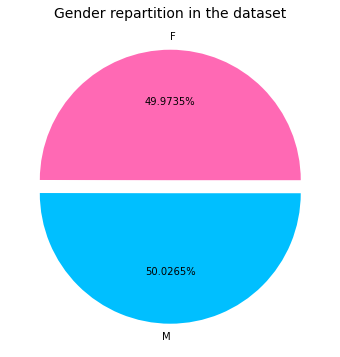

In [11]:
repartition_gender = dataset.groupby("GENDER").GENDER.count()

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x = repartition_gender, 
        labels = repartition_gender.index, 
        explode = [0.05]*len(repartition_gender), 
        autopct="%.4f%%", 
        colors = ["hotpink", "deepskyblue"])
plt.title("Gender repartition in the dataset", fontsize=14);
pie.savefig("charts/GenderRepartition.png")

### B. Age repartition

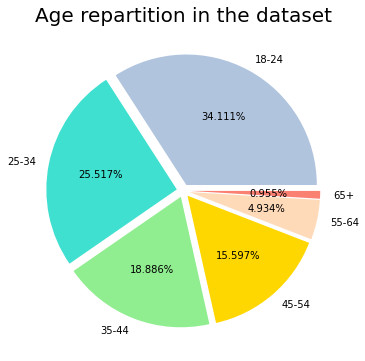

In [12]:
repartition_age = dataset.groupby("AGE").AGE.count()

pie, ax = plt.subplots(figsize=[10,6])
plt.title("Age repartition in the dataset",fontsize=20)

plt.pie(x = repartition_age, 
        labels = repartition_age.index, 
        explode = [0.05]*len(repartition_age), 
        autopct="%.3f%%", 
        colors = colors)

pie.savefig("charts/AgeRepartition.png")

### C. Country representation

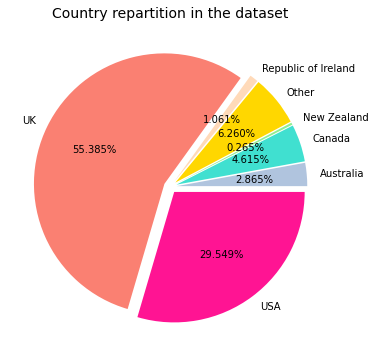

In [13]:
repartition_country = dataset.groupby("COUNTRY").COUNTRY.count()

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x = repartition_country, 
        labels = repartition_country.index, 
        explode = [0.05]*len(repartition_country), 
        autopct="%.3f%%", colors = colors)
plt.title("Country repartition in the dataset", fontsize=14);
pie.savefig("charts/CountryRepartition.png")

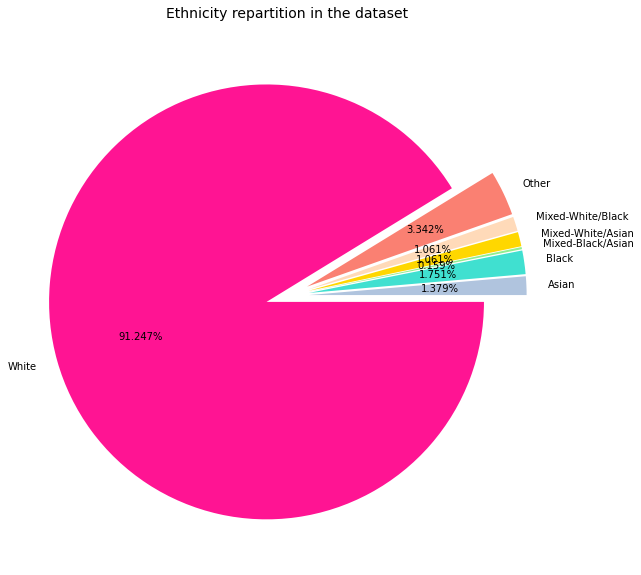

In [14]:
repartition_ethnicity = dataset.groupby("ETHNICITY").ETHNICITY.count()

pie, ax = plt.subplots(figsize=[10,10])
plt.pie(x = repartition_ethnicity, 
        labels = repartition_ethnicity.index, 
        explode = [0.1]*len(repartition_ethnicity), 
        autopct="%.3f%%", colors = colors)
plt.title("Ethnicity repartition in the dataset", fontsize=14);
pie.savefig("charts/EthincityRepartition.png")

### E. Drug consumption 

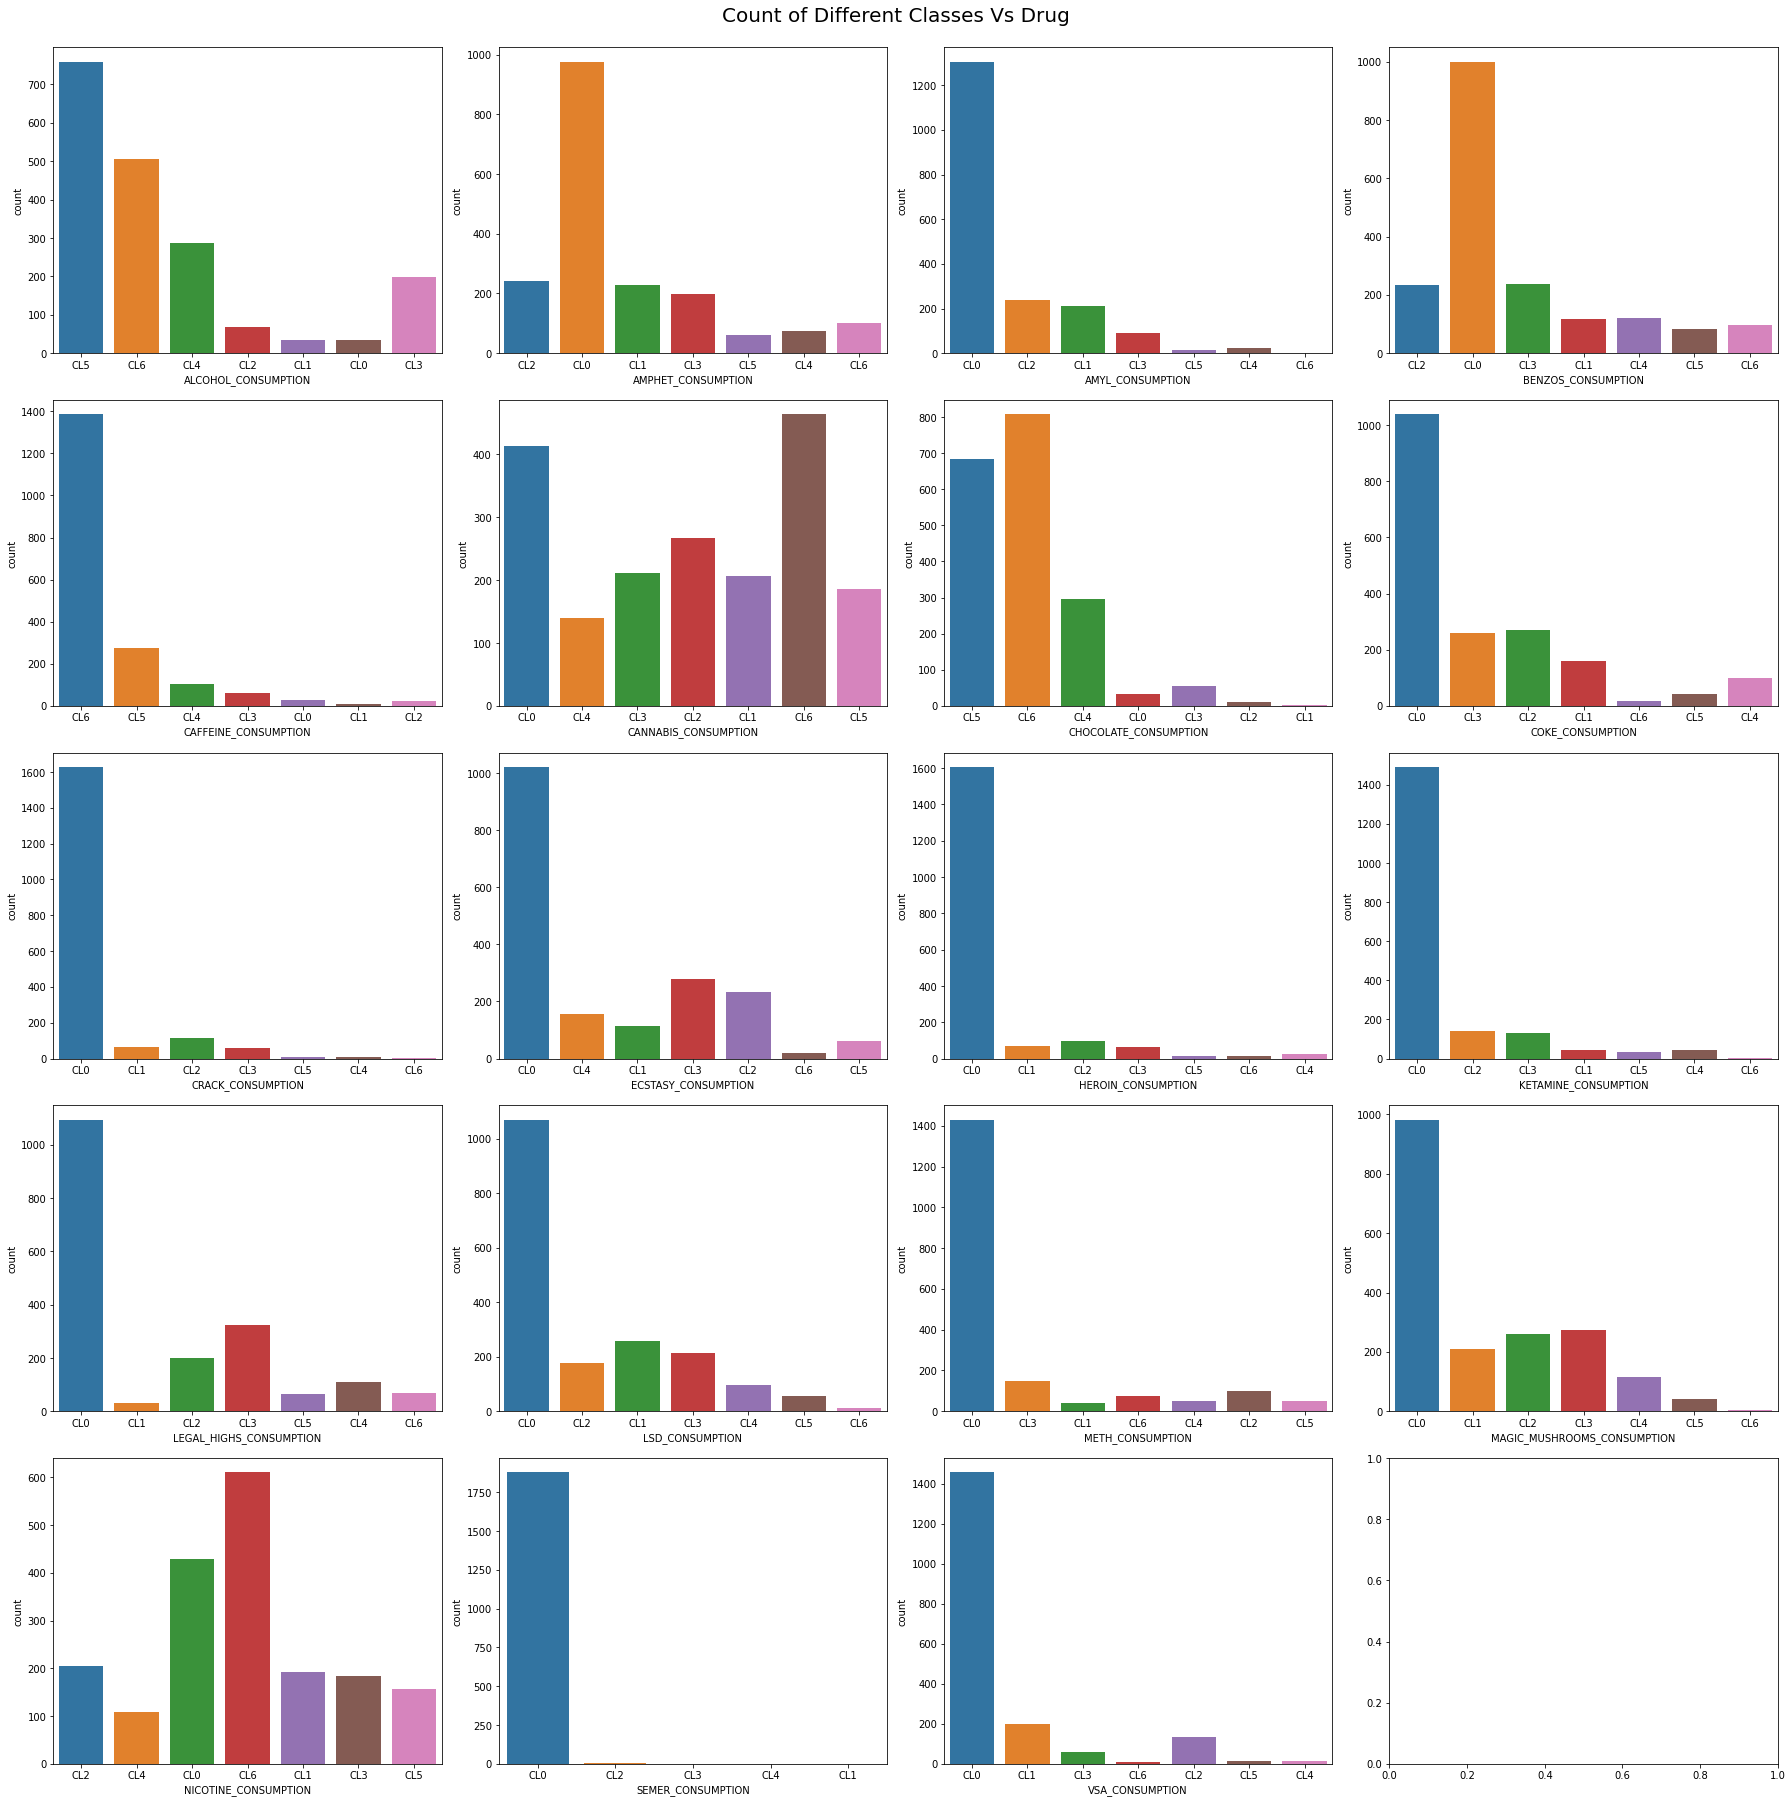

In [15]:
fig, axes = plt.subplots(5,4,figsize = (25,25))
fig.suptitle("Count of Different Classes Vs Drug",fontsize=20, y=1)
k=13
for i in range(5):
    for j in range(4):
        sns.countplot(x=columns[k], data=dataset,ax=axes[i][j])
        k+=1
        if k == 32 : 
            break; 

fig.savefig("charts/DrugConsumption.png")

plt.tight_layout()
plt.show()


Retrieving all datas for each drug : 
how many 
- haven't never consumed, 
- consumed over a Decade Ago, 
- in the last decade, 
- in the last year, 
- in the last month, 
- in the last week, 
- in the last 24h

In [16]:
alcohol_consumption = dataset.groupby('ALCOHOL_CONSUMPTION').ALCOHOL_CONSUMPTION.count()
amphet_consumption = dataset.groupby('AMPHET_CONSUMPTION').AMPHET_CONSUMPTION.count()
amyl_consumption = dataset.groupby('AMYL_CONSUMPTION').AMYL_CONSUMPTION.count()
benzos_consumption = dataset.groupby('BENZOS_CONSUMPTION').BENZOS_CONSUMPTION.count()
caffeine_consumption = dataset.groupby('CAFFEINE_CONSUMPTION').CAFFEINE_CONSUMPTION.count()
cannabis_consumption = dataset.groupby('CANNABIS_CONSUMPTION').CANNABIS_CONSUMPTION.count()
chocolate_consumption = dataset.groupby('CHOCOLATE_CONSUMPTION').CHOCOLATE_CONSUMPTION.count()
coke_consumption = dataset.groupby('COKE_CONSUMPTION').COKE_CONSUMPTION.count()
crack_consumption = dataset.groupby('CRACK_CONSUMPTION').CRACK_CONSUMPTION.count()
ecstasy_consumption = dataset.groupby('ECSTASY_CONSUMPTION').ECSTASY_CONSUMPTION.count()
heroin_consumption = dataset.groupby('HEROIN_CONSUMPTION').HEROIN_CONSUMPTION.count()
ketamine_consumption = dataset.groupby('KETAMINE_CONSUMPTION').KETAMINE_CONSUMPTION.count()
legal_highs_consumption = dataset.groupby('LEGAL_HIGHS_CONSUMPTION').LEGAL_HIGHS_CONSUMPTION.count()
lsd_consumption = dataset.groupby('LSD_CONSUMPTION').LSD_CONSUMPTION.count()
meth_consumption = dataset.groupby('METH_CONSUMPTION').METH_CONSUMPTION.count()
magic_mushrooms_consumption = dataset.groupby('MAGIC_MUSHROOMS_CONSUMPTION').MAGIC_MUSHROOMS_CONSUMPTION.count()
nicotine_consumption = dataset.groupby('NICOTINE_CONSUMPTION').NICOTINE_CONSUMPTION.count()
semer_consumption = dataset.groupby('SEMER_CONSUMPTION').SEMER_CONSUMPTION.count()
vsa_consumption = dataset.groupby('VSA_CONSUMPTION').VSA_CONSUMPTION.count()

In [17]:
all_drugs = []
all_drugs.append(alcohol_consumption)
all_drugs.append(amphet_consumption)
all_drugs.append(amyl_consumption)
all_drugs.append(benzos_consumption)
all_drugs.append(caffeine_consumption)
all_drugs.append(cannabis_consumption)
all_drugs.append(chocolate_consumption)
all_drugs.append(coke_consumption)
all_drugs.append(crack_consumption)
all_drugs.append(ecstasy_consumption)
all_drugs.append(heroin_consumption)
all_drugs.append(ketamine_consumption)
all_drugs.append(legal_highs_consumption)
all_drugs.append(lsd_consumption)
all_drugs.append(meth_consumption)
all_drugs.append(magic_mushrooms_consumption)
all_drugs.append(nicotine_consumption)
all_drugs.append(semer_consumption)
all_drugs.append(vsa_consumption)

In [18]:
all_drugs_labels = [all_drugs[i].name for i in range(len(all_drugs))]
last_24h = [all_drugs[i][-1] for i in range(len(all_drugs))]
never_consumed = [all_drugs[i][0] for i in range(len(all_drugs))]

#### Drug consumption in the last 24h

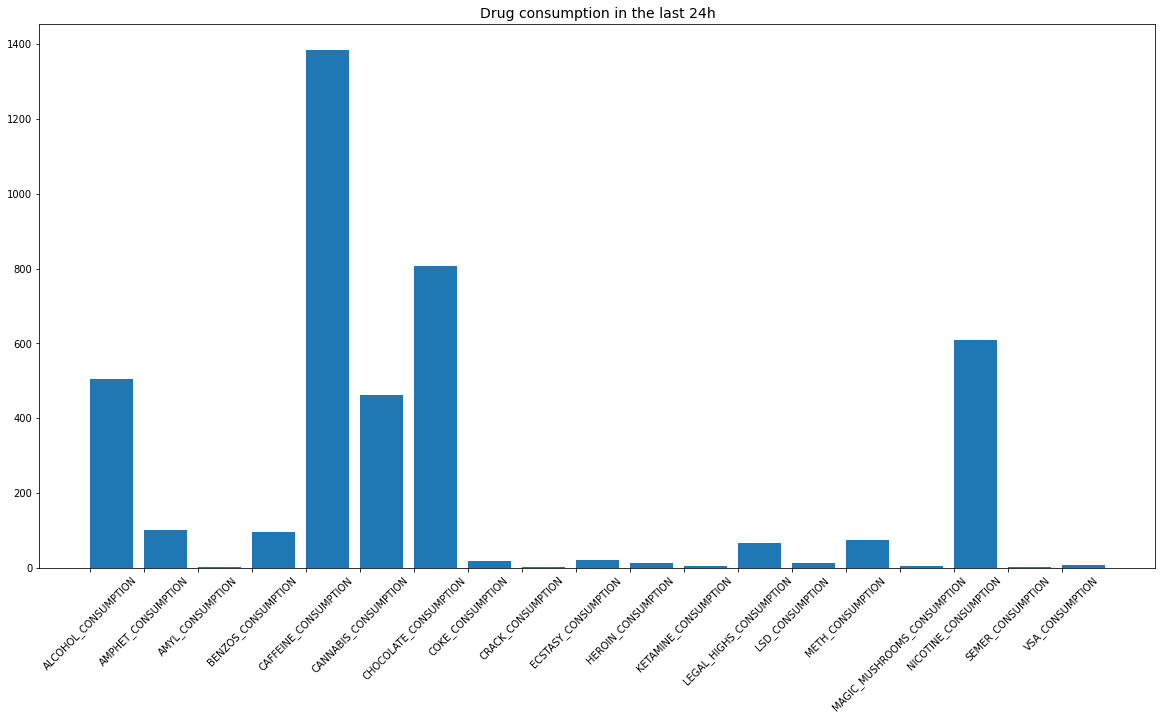

In [19]:
pie, ax = plt.subplots(figsize=[20,10])
plt.bar(all_drugs_labels, last_24h, align="edge")
plt.title("Drug consumption in the last 24h", fontsize=14);
plt.xticks(rotation = 45)
pie.savefig("charts/all_last24H.png")

In [20]:
last_24h_consumption = pd.DataFrame(list(zip(all_drugs_labels,last_24h)), columns= ['DRUG','COUNT'])
last_24h_consumption.sort_values(by=['COUNT'], inplace=True, ascending=False)
last_24h_consumption

,DRUG,COUNT
4,CAFFEINE_CONSUMPTION,1385
6,CHOCOLATE_CONSUMPTION,807
16,NICOTINE_CONSUMPTION,610
0,ALCOHOL_CONSUMPTION,505
5,CANNABIS_CONSUMPTION,463
1,AMPHET_CONSUMPTION,102
3,BENZOS_CONSUMPTION,95
14,METH_CONSUMPTION,73
12,LEGAL_HIGHS_CONSUMPTION,67
9,ECSTASY_CONSUMPTION,21


#### Top 5 most consumed drug in the last 24 hours

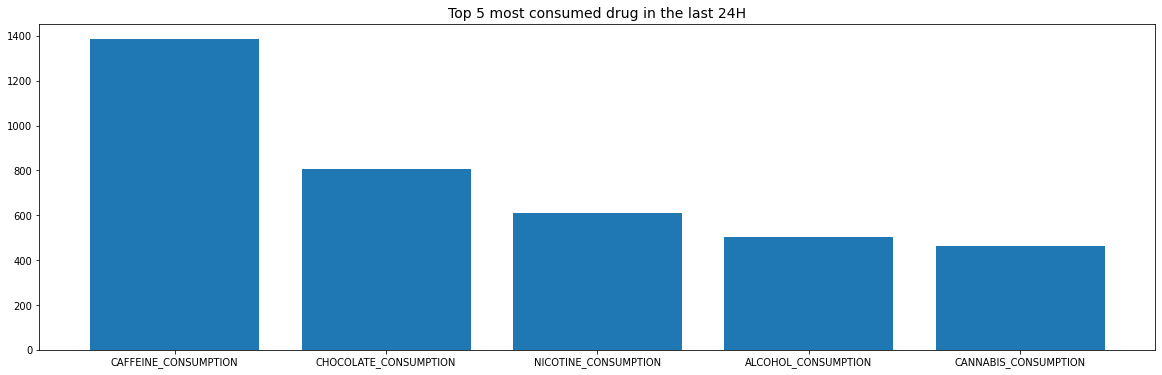

In [21]:
pie, ax = plt.subplots(figsize=[20,6])
plt.bar(last_24h_consumption.DRUG.head(), last_24h_consumption.COUNT.head())
plt.title("Top 5 most consumed drug in the last 24H", fontsize=14);
pie.savefig("charts/top5_mostConsumed.png")

#### Top 5 of least consumed drug in the last 24 hours

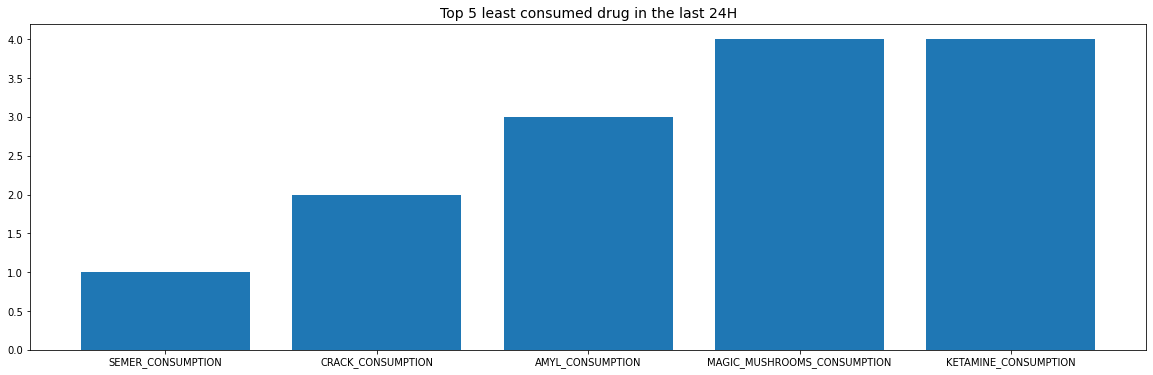

In [22]:
last_24h_consumption.sort_values(by=['COUNT'], inplace=True, ascending=True)
pie, ax = plt.subplots(figsize=[20,6])
plt.bar(last_24h_consumption.DRUG.head(), last_24h_consumption.COUNT.head())
plt.title("Top 5 least consumed drug in the last 24H", fontsize=14);
pie.savefig("charts/top5_leastConsumed.png")

#### Never consumed each drug

In [23]:
never_consumed = pd.DataFrame(list(zip(all_drugs_labels,never_consumed)), columns= ['DRUG','COUNT'])
never_consumed.sort_values(by=['COUNT'], inplace=True, ascending=False)
never_consumed

,DRUG,COUNT
17,SEMER_CONSUMPTION,1877
8,CRACK_CONSUMPTION,1627
10,HEROIN_CONSUMPTION,1605
11,KETAMINE_CONSUMPTION,1490
18,VSA_CONSUMPTION,1455
14,METH_CONSUMPTION,1429
2,AMYL_CONSUMPTION,1305
12,LEGAL_HIGHS_CONSUMPTION,1094
13,LSD_CONSUMPTION,1069
7,COKE_CONSUMPTION,1038


#### Top 10 never consumed drug

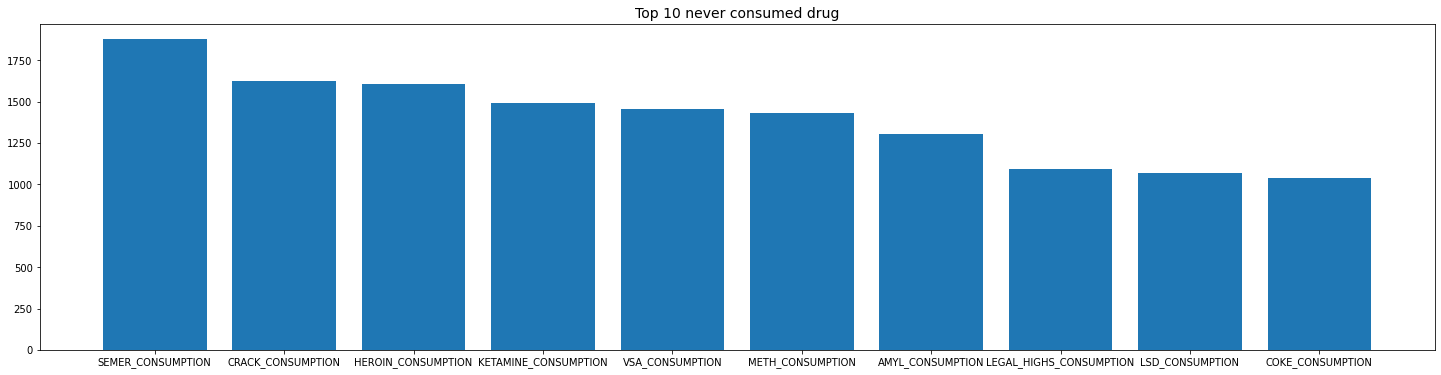

In [24]:
pie, ax = plt.subplots(figsize=[25,6])
plt.bar(never_consumed.DRUG.head(10), never_consumed.COUNT.head(10))
plt.title("Top 10 never consumed drug", fontsize=14);
pie.savefig("charts/Top10_neverConsumed.png")


#### The one who has used the most drugs in 24 hours

In [25]:
drug_used_in_24h = ((dataset.iloc[:,13:] == "CL6").sum(axis = 1))
max_drug_used_in_24h = drug_used_in_24h.sort_values().max()
most_druged_person = dataset[drug_used_in_24h  == max_drug_used_in_24h ]
most_druged_person

,ID,AGE,GENDER,EDUCATION_LEVEL,COUNTRY,ETHNICITY,NSCORE_VALUE,ESCORE_VALUE,OSCORE_VALUE,ASCORE_VALUE,...,ECSTASY_CONSUMPTION,HEROIN_CONSUMPTION,KETAMINE_CONSUMPTION,LEGAL_HIGHS_CONSUMPTION,LSD_CONSUMPTION,METH_CONSUMPTION,MAGIC_MUSHROOMS_CONSUMPTION,NICOTINE_CONSUMPTION,SEMER_CONSUMPTION,VSA_CONSUMPTION
979,983,18-24,M,"Some college or university, no certificate or ...",UK,White,46,46,36,29,...,CL4,CL0,CL0,CL6,CL0,CL6,CL0,CL6,CL0,CL2


#### The one who has never consumed any drug at all

In [26]:
# There is only a single person who has never consumed any presented drug 
# I think he is a liar, I don't think he has never consumed any chocolate in his life ... 

never_consumed_any_drug = dataset[(dataset.iloc[:,13:] == "CL0").sum(axis = 1)  >= 19 ]
never_consumed_any_drug

,ID,AGE,GENDER,EDUCATION_LEVEL,COUNTRY,ETHNICITY,NSCORE_VALUE,ESCORE_VALUE,OSCORE_VALUE,ASCORE_VALUE,...,ECSTASY_CONSUMPTION,HEROIN_CONSUMPTION,KETAMINE_CONSUMPTION,LEGAL_HIGHS_CONSUMPTION,LSD_CONSUMPTION,METH_CONSUMPTION,MAGIC_MUSHROOMS_CONSUMPTION,NICOTINE_CONSUMPTION,SEMER_CONSUMPTION,VSA_CONSUMPTION
1277,1281,18-24,M,University degree,UK,Asian,44,43,38,20,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0


#### Liars ? 

Semer is class of fictitious drug Semeron consumption. People who said they have already consumed this drug are liars. 

In [49]:
dataset[(dataset["SEMER_CONSUMPTION"] != "CL0")]

,ID,AGE,GENDER,EDUCATION_LEVEL,COUNTRY,ETHNICITY,NSCORE_VALUE,ESCORE_VALUE,OSCORE_VALUE,ASCORE_VALUE,...,ECSTASY_CONSUMPTION,HEROIN_CONSUMPTION,KETAMINE_CONSUMPTION,LEGAL_HIGHS_CONSUMPTION,LSD_CONSUMPTION,METH_CONSUMPTION,MAGIC_MUSHROOMS_CONSUMPTION,NICOTINE_CONSUMPTION,SEMER_CONSUMPTION,VSA_CONSUMPTION
727,730,25-34,F,Left school at 16 years,Australia,White,30,41,45,31,...,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL6,CL2,CL2
817,821,18-24,M,"Some college or university, no certificate or ...",Australia,Asian,29,50,49,36,...,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL4,CL3,CL0
1516,1520,18-24,M,"Some college or university, no certificate or ...",USA,White,33,33,35,26,...,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL2,CL3,CL1
1533,1537,18-24,F,"Some college or university, no certificate or ...",USA,Other,31,44,46,47,...,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL4,CL3
1698,1702,35-44,F,University degree,USA,White,54,33,56,40,...,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL6,CL2,CL0
1769,1773,18-24,M,Left school at 18 years,USA,Mixed-White/Black,32,47,51,35,...,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL3,CL1,CL3
1806,1810,18-24,F,Left school at 17 years,USA,White,48,46,51,25,...,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL6,CL1,CL2
1823,1827,18-24,F,University degree,USA,White,38,37,50,43,...,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL5,CL2,CL0


#### The most consumed drug in the last 24h by country

In [28]:
countries = ['Australia','UK', 'USA', 'New Zealand', 'Other', 'Republic of Ireland', 'Canada']
dataset['NUMBER_OF_DRUG_USED_IN_24H'] = drug_used_in_24h
last_24H_consumption_per_country = [(dataset[dataset["COUNTRY"] == countries[i]].iloc[:,13:-1] == "CL6").sum(axis = 0) for i in range(len(countries))]
last_24H_consumption_per_country = [last_24H_consumption_per_country[i].sort_values(ascending = False) for i in range(len(last_24H_consumption_per_country))]
last_24H_consumption_per_country

[CAFFEINE_CONSUMPTION           40
 CHOCOLATE_CONSUMPTION          21
 NICOTINE_CONSUMPTION           18
 ALCOHOL_CONSUMPTION            15
 CANNABIS_CONSUMPTION           15
 AMPHET_CONSUMPTION              4
 BENZOS_CONSUMPTION              4
 LEGAL_HIGHS_CONSUMPTION         4
 METH_CONSUMPTION                3
 ECSTASY_CONSUMPTION             2
 LSD_CONSUMPTION                 1
 AMYL_CONSUMPTION                1
 MAGIC_MUSHROOMS_CONSUMPTION     1
 CRACK_CONSUMPTION               0
 COKE_CONSUMPTION                0
 SEMER_CONSUMPTION               0
 HEROIN_CONSUMPTION              0
 KETAMINE_CONSUMPTION            0
 VSA_CONSUMPTION                 0
 dtype: int64,
 CAFFEINE_CONSUMPTION           795
 CHOCOLATE_CONSUMPTION          496
 ALCOHOL_CONSUMPTION            304
 NICOTINE_CONSUMPTION           262
 CANNABIS_CONSUMPTION           107
 LEGAL_HIGHS_CONSUMPTION         14
 AMPHET_CONSUMPTION              13
 METH_CONSUMPTION                13
 BENZOS_CONSUMPTION             

A column with the number of drugs used in the last 24h is added to the dataset. 

In [29]:
dataset.head()

,ID,AGE,GENDER,EDUCATION_LEVEL,COUNTRY,ETHNICITY,NSCORE_VALUE,ESCORE_VALUE,OSCORE_VALUE,ASCORE_VALUE,...,HEROIN_CONSUMPTION,KETAMINE_CONSUMPTION,LEGAL_HIGHS_CONSUMPTION,LSD_CONSUMPTION,METH_CONSUMPTION,MAGIC_MUSHROOMS_CONSUMPTION,NICOTINE_CONSUMPTION,SEMER_CONSUMPTION,VSA_CONSUMPTION,NUMBER_OF_DRUG_USED_IN_24H
0,1,35-44,F,Professional certificate/diploma,UK,Mixed-White/Asian,39,35,40,29,...,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0,1
1,2,25-34,M,Doctorate degree,UK,White,29,51,53,40,...,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0,2
2,3,35-44,M,Professional certificate/diploma,UK,White,31,44,38,24,...,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,2
3,4,18-24,F,Masters degree,UK,White,34,33,44,39,...,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0,0
4,5,35-44,F,Doctorate degree,UK,White,43,27,41,33,...,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0,2


#### Top 5 of most consumed drug in Australia in the last 24h 

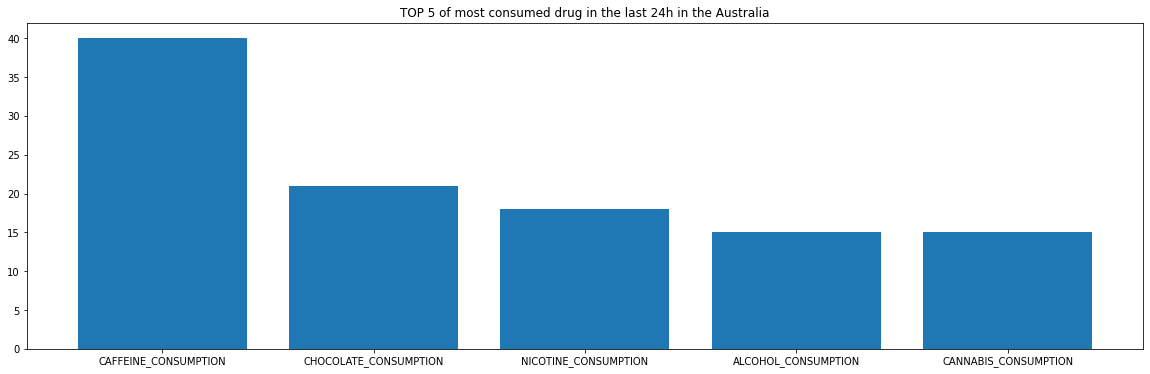

In [30]:
pie, ax = plt.subplots(figsize=[20,6])
plt.bar(last_24H_consumption_per_country[0].keys()[:5], last_24H_consumption_per_country[0].head())
plt.title("TOP 5 of most consumed drug in the last 24h in the Australia")
pie.savefig("charts/top5_mostConsumedAustralia.png")

#### The most consumed drug in the last 24h by ethnicity

In [31]:
ethnicity = dataset.ETHNICITY.unique()
last_24H_consumption_per_ethnicity = [(dataset[dataset["COUNTRY"] == countries[i]].iloc[:,13:-1] == "CL6").sum(axis = 0) for i in range(len(countries))]
last_24H_consumption_per_ethnicity = [last_24H_consumption_per_ethnicity[i].sort_values(ascending = False) for i in range(len(last_24H_consumption_per_ethnicity))]
last_24H_consumption_per_ethnicity

[CAFFEINE_CONSUMPTION           40
 CHOCOLATE_CONSUMPTION          21
 NICOTINE_CONSUMPTION           18
 ALCOHOL_CONSUMPTION            15
 CANNABIS_CONSUMPTION           15
 AMPHET_CONSUMPTION              4
 BENZOS_CONSUMPTION              4
 LEGAL_HIGHS_CONSUMPTION         4
 METH_CONSUMPTION                3
 ECSTASY_CONSUMPTION             2
 LSD_CONSUMPTION                 1
 AMYL_CONSUMPTION                1
 MAGIC_MUSHROOMS_CONSUMPTION     1
 CRACK_CONSUMPTION               0
 COKE_CONSUMPTION                0
 SEMER_CONSUMPTION               0
 HEROIN_CONSUMPTION              0
 KETAMINE_CONSUMPTION            0
 VSA_CONSUMPTION                 0
 dtype: int64,
 CAFFEINE_CONSUMPTION           795
 CHOCOLATE_CONSUMPTION          496
 ALCOHOL_CONSUMPTION            304
 NICOTINE_CONSUMPTION           262
 CANNABIS_CONSUMPTION           107
 LEGAL_HIGHS_CONSUMPTION         14
 AMPHET_CONSUMPTION              13
 METH_CONSUMPTION                13
 BENZOS_CONSUMPTION             

In [32]:
ethnicity

array(['Mixed-White/Asian', 'White', 'Other', 'Mixed-White/Black',
       'Asian', 'Black', 'Mixed-Black/Asian'], dtype=object)

#### Top 5 of most consumed drug by white in the last 24h 

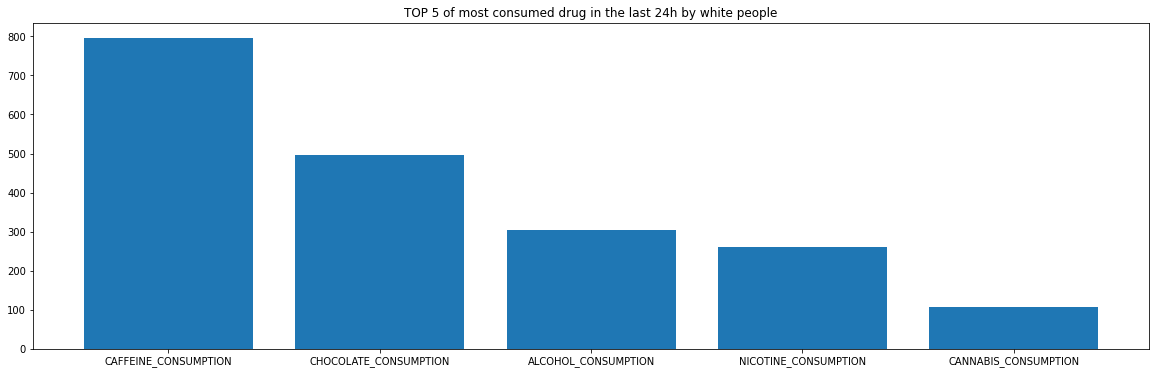

In [33]:
pie, ax = plt.subplots(figsize=[20,6])
plt.bar(last_24H_consumption_per_ethnicity[1].keys()[:5], last_24H_consumption_per_ethnicity[1].head())
plt.title("TOP 5 of most consumed drug in the last 24h by white people")
pie.savefig("charts/top5_mostConsumedWhite.png")

## Correlation matrix

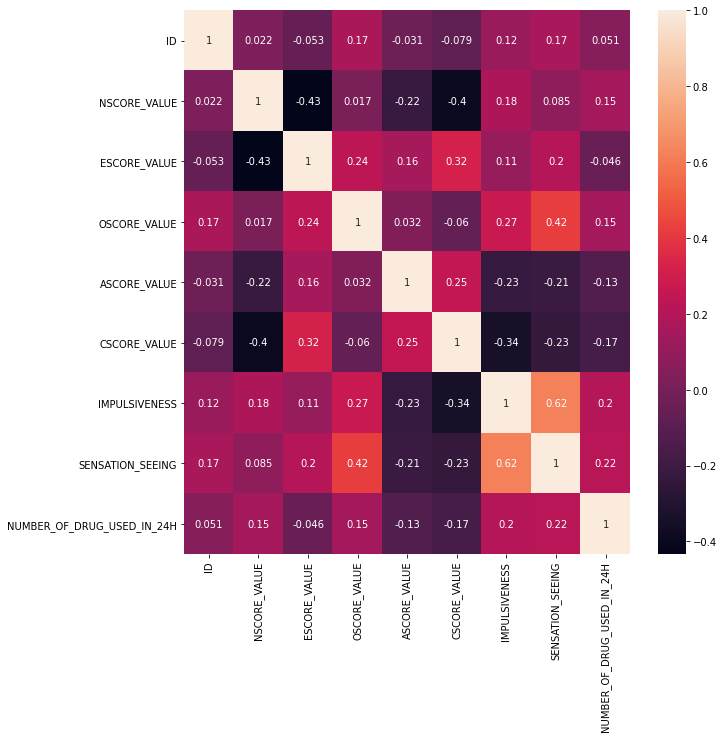

In [34]:
pie, ax = plt.subplots(figsize=[10,10])
corr = dataset.corr()
sns.heatmap(corr, annot=True)
plt.show()

We delete the ID column since it is not necessary for our analysis and we re-plot our correlation matrix 

In [35]:
del dataset["ID"]

/opt/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


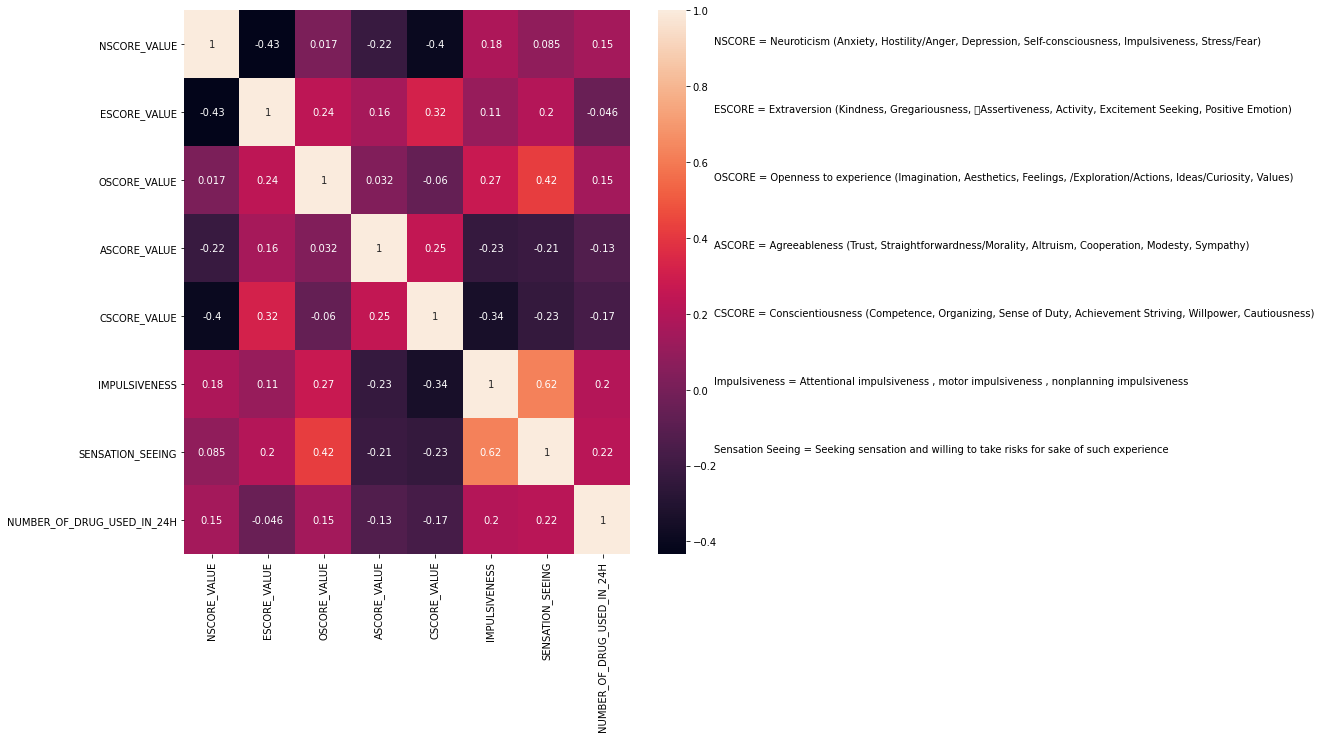

In [36]:
pie, ax = plt.subplots(figsize=[10,10])
corr = dataset.corr()
sns.heatmap(corr, annot=True)
x = 9.5
ax.text(x, 0.5, "NSCORE = Neuroticism (Anxiety, Hostility/Anger, Depression, Self-consciousness, Impulsiveness, Stress/Fear)")
ax.text(x, 1.5, "ESCORE = Extraversion (Kindness, Gregariousness, 	Assertiveness, Activity, Excitement Seeking, Positive Emotion)")
ax.text(x, 2.5, "OSCORE = Openness to experience (Imagination, Aesthetics, Feelings, /Exploration/Actions, Ideas/Curiosity, Values)")
ax.text(x, 3.5, "ASCORE = Agreeableness (Trust, Straightforwardness/Morality, Altruism, Cooperation, Modesty, Sympathy)")
ax.text(x, 4.5, "CSCORE = Conscientiousness (Competence, Organizing, Sense of Duty, Achievement Striving, Willpower, Cautiousness)")
ax.text(x, 5.5, "Impulsiveness = Attentional impulsiveness , motor impulsiveness , nonplanning impulsiveness")
ax.text(x, 6.5, "Sensation Seeing = Seeking sensation and willing to take risks for sake of such experience")
plt.show()

# Impulsiveness : 
# (ability to concentrate or focus attention)
# (the tendency to act without thinking)
# (lack of future planning and forethought

#### Interpretation of the correlation matrix

- -1 indicates a perfectly negative linear correlation between two variables.
- 0 indicates no linear correlation between two variables.
- 1 indicates a perfectly positive linear correlation between two variables.
- The **further away the value is from zero**, the **stronger** the relationship between the two variables

We can see in this correlation matrix that the sensation seeking by taking drug and the impulsiveness are correlated. <br/>
They will be more likely a drug consumer as the will of seek sensation are higher. <br/>
A study shows that 
*"Impulsivity and sensation seeking are personality traits that appear to influence risk-taking generally, 
and substance use processes more specifically"* which is what we have demonstrated right now. <br/>

Source : *[IMPULSIVE SENSATION SEEKING, PARENTAL HISTORY OF ALCOHOL PROBLEMS, AND CURRENT ALCOHOL AND TOBACCO USE IN ADOLESCENTS](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2678841/)*

Also, if you are open to experience new things, you will be a sensation-seeking person. 
<br/>

In the meantime, if you are someone who is conscious, you won't be a anxious person, or a person who takes risks impulsively. <br/>
You won't try to seek some risk sensations. 
<br/>

Finally, there is no correlation between your neuroticism and the fact of beeing open to experience : 
we can be an open-minded person on mutiple subject but feel anxious, or on the contrary beeing someone who is not open but feel good. 




**Note: ** There is a mistake in the website where there is the dataset. It is not "Sensation seeing" but "Sensation seeking". 